***
# <font color=green size=10>ESTUDO DE CASO TITANIC</font>
***

## <font color=green>Faremos um estudo a cerca de com base nos seguintes dados como foi feita a escolha das pessoas que iriam sobreviver.</font>
***

### Importando a Base de Dados

In [248]:
import pandas as pd
import seaborn as sns

dados = pd.read_csv('./titanic.data')
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Renomeando as Colunas

In [249]:
dados.columns = ['idPassageiro', 'Sobreviveu', 'ClasseIngresso', "Nome", "Sexo", "Idade", "QtdIrmaos", "QtdPais", "NumTicket", "Tarifa", "Cabine", "LocalEmbarque"]
dados.head()

,idPassageiro,Sobreviveu,ClasseIngresso,Nome,Sexo,Idade,QtdIrmaos,QtdPais,NumTicket,Tarifa,Cabine,LocalEmbarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Iremos realizar uma analise para descobrir o que poderia inteferir na probabilidade de uma pessoa sobreviver no acidente do titanic

##### Sobreviventes baseado na Idade 

In [250]:
dados_sobreviventes = dados.query("Sobreviveu == 1");

dfSobreviventesIdade = pd.DataFrame(dados_sobreviventes['Idade'].value_counts())
dfSobreviventesIdade.reset_index(level=0, inplace=True)
dfSobreviventesIdade.columns = ["Idade",'Quantidade']
dfSobreviventesIdade.head()

,Idade,Quantidade
0,24.0,15
1,36.0,11
2,35.0,11
3,27.0,11
4,22.0,11


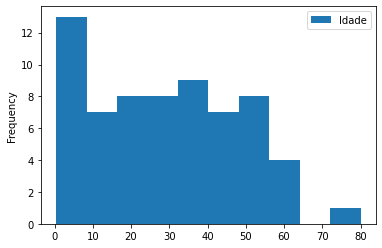

In [251]:
dfSobreviventesIdade.plot(y = 'Idade', kind='hist')

##### Sobreviventes baseado no Sexo

In [252]:
dfSobreviventesSexo = pd.DataFrame(dados_sobreviventes['Sexo'].value_counts())
dfSobreviventesSexo.reset_index(level=0, inplace=True)
dfSobreviventesSexo.columns = ["Sexo",'Quantidade']
dfSobreviventesSexo.head()

,Sexo,Quantidade
0,female,233
1,male,109


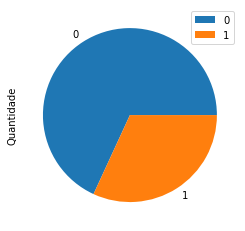

In [253]:
dfSobreviventesSexo.plot(y = 'Quantidade', kind='pie')

##### Sobreviventes baseado nas Cabines 

<img src='./titanic.png' width='70%'>

In [254]:
dados_sobreviventes_cabines = dados_sobreviventes.dropna()
dados_sobreviventes_cabines['Cabine'] = dados_sobreviventes_cabines['Cabine'].str[0]

dados_sobreviventes_cabines = pd.DataFrame(dados_sobreviventes_cabines['Cabine'].value_counts())
dados_sobreviventes_cabines.head()

<ipython-input-254-7cc8dd479106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sobreviventes_cabines['Cabine'] = dados_sobreviventes_cabines['Cabine'].str[0]


,Cabine
B,32
C,30
D,23
E,22
F,7


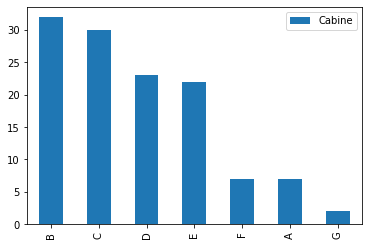

In [255]:
dados_sobreviventes_cabines.plot(y = 'Cabine', kind='bar')

##### Sobreviventes baseado na Classe do Ingresso

In [256]:
dfSobreviventesPassagens = pd.DataFrame(dados_sobreviventes['ClasseIngresso'].value_counts())
dfSobreviventesPassagens.reset_index(level=0, inplace=True)
dfSobreviventesPassagens.columns = ["Classe",'Quantidade']
dfSobreviventesPassagens

,Classe,Quantidade
0,1,136
1,3,119
2,2,87


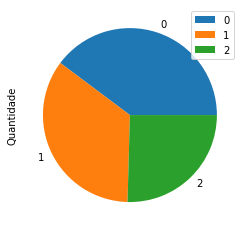

In [257]:
dfSobreviventesPassagens.plot(y = 'Quantidade', kind='pie')

# <font color=green>Correlacionando as Informações</font>
***

## <font color=green>Idade X Sexo</font>
***

In [258]:
gb = dados_sobreviventes.groupby(['Idade', 'Sexo'])

gb.head()

,idPassageiro,Sobreviveu,ClasseIngresso,Nome,Sexo,Idade,QtdIrmaos,QtdPais,NumTicket,Tarifa,Cabine,LocalEmbarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


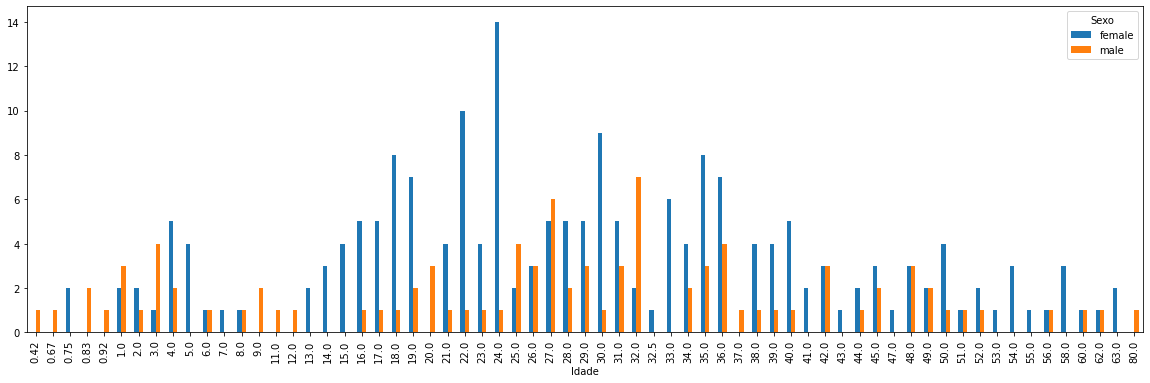

In [259]:
dadosIdadeSexo = gb.size()
dadosIdadeSexo.unstack(level=0)
dadosIdadeSexo.unstack(level=1)
dadosIdadeSexo.unstack(level=1).plot(kind='bar', figsize=(20, 6))

## <font color=green>Cabine X Sexo</font>
***

In [260]:
dadosCabine = dados_sobreviventes.dropna()

dadosCabine['Cabine'] = dadosCabine['Cabine'].astype(str).str[0]

gbc = dadosCabine.groupby(['Cabine', 'Sexo'])

gbc.head(5)

<ipython-input-260-483222c898a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosCabine['Cabine'] = dadosCabine['Cabine'].astype(str).str[0]


,idPassageiro,Sobreviveu,ClasseIngresso,Nome,Sexo,Idade,QtdIrmaos,QtdPais,NumTicket,Tarifa,Cabine,LocalEmbarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.7292,D,C
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.00,0,0,C.A. 29395,10.5000,F,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D,C


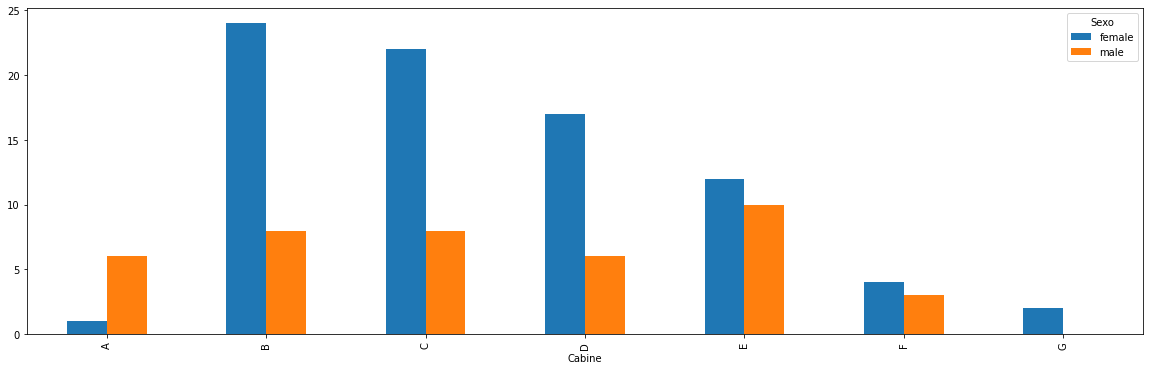

In [261]:
dadosCabineSexo = gbc.size()
dadosCabineSexo.unstack(level=0)
dadosCabineSexo.unstack(level=1)
dadosCabineSexo.unstack(level=1).plot(kind='bar', figsize=(20, 6))

# <font color=green>Pontos Levantados</font>
***

### <font color=black>Bem como conseguimos analisar nos dados acima, as chances de sobrevivencia seriam maiores se você fosse uma pessoa do sexo feminino com idades entre 18 a 36 anos, e estivesse hospedado(a) nas primeiras cabines B, C e D. E que a taxa paga pela passagem não teve influência na escolha dos sobreviventes.</font>
***

In [262]:
# Filtrando sobreviventes
dados = dados.query("Sobreviveu == 1");

# Removendo Dados sem Cabine
dados = dados.dropna();
dados['Cabine'] = dados['Cabine'].str[0]

#Filtrando baseado na Idade
dados = dados.query("Idade >= 18 and Idade <= 36");

dados.head()

,idPassageiro,Sobreviveu,ClasseIngresso,Nome,Sexo,Idade,QtdIrmaos,QtdPais,NumTicket,Tarifa,Cabine,LocalEmbarque
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5,A,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C,S


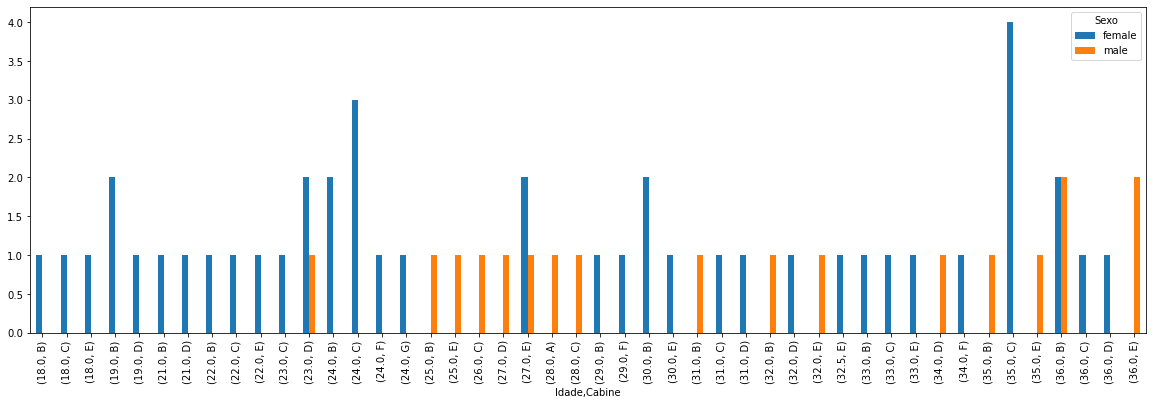

In [263]:
gb = dados.groupby(['Idade', 'Cabine', 'Sexo'])

dadosFinal = gb.size()
dadosFinal.unstack(level=0)
dadosFinal.unstack(level=1)
dadosFinal.unstack(level=2)
dadosFinal.unstack(level=2).plot(kind='bar', figsize=(20, 6))